In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#1
df = pd.read_csv('Housing.csv',index_col=0)

In [46]:
#2A
feat = df.columns
print(feat)
#2B
#2C
df.dtypes   #datatype of features

#features/columns = 12
#instances/rows = 546

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')


price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [109]:
#2D
df.isnull().values.any()


False

In [51]:
7/10 * 546

382.2

In [86]:
df7 = df.tail(383)

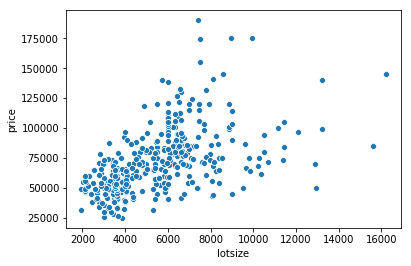

In [89]:
#3A: lotsize=independent, price=dependent

#3B
sns.scatterplot(x='lotsize',y='price',data=df7)

In [186]:
X = df['lotsize']
y = df['price']
l = linear_regression_model(X,y)

X = X.to_frame()

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
#4A,B
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
mod = LinearRegression()

In [178]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [179]:
print(mod.intercept_)

35118.53465830405


In [180]:
#4C: lINEAR MODEL LEARNT y=6.8113x+35118.53(mod.intercept_)


In [181]:
predictions = mod.predict(X_test)

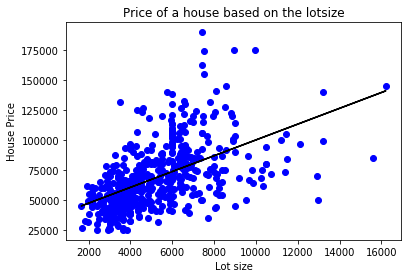

In [185]:
#4D

def regression_line(X,y,l):
    plt.scatter(X, y , color='blue')
    yP = l[1]+l[0]*X
    plt.plot(X, yP, color='black')
    plt.xlabel('Lot size')
    plt.ylabel('House Price')
    plt.title('Price of a house based on the lotsize')
    plt.show()
regression_line(X,y,l)

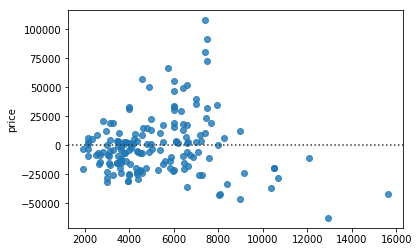

In [157]:
sns.residplot(X_test,y_test)

In [149]:
from sklearn import metrics

In [102]:
#4F
print('MSE:', metrics.mean_squared_error(y_test,predictions))
squared_errors = (y_test-predictions)**2
SSE = np.sum(squared_errors)
print('SSE:', SSE)

MSE: 883962530.3554429
SSE: 144969854978.29263


In [106]:
#4G
coE = pd.DataFrame(mod.coef_,X.columns,columns=['Coefficient'])
coE

,Coefficient
lotsize,6.8113


In [ ]:
#MULTIPLE LINEAR REGRESSION

In [69]:
#1
from sklearn.datasets import load_boston

In [70]:
#2
boston = load_boston()

In [71]:
#3
type(boston)

sklearn.utils.Bunch

In [72]:
#4
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [118]:
#5 create a dataframe
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df_y = pd.DataFrame(boston.target)

In [123]:
boston_df.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [132]:
#feature names of Boston
print('Feature_names of Boston')
print('')
print(boston_df.columns)
print('')

#target of Boston
print('Target of Boston')
print('')
print(boston_df_y)

Feature_names of Boston

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Target of Boston

        0
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
10   15.0
11   18.9
12   21.7
13   20.4
14   18.2
15   19.9
16   23.1
17   17.5
18   20.2
19   18.2
20   13.6
21   19.6
22   15.2
23   14.5
24   15.6
25   13.9
26   16.6
27   14.8
28   18.4
29   21.0
..    ...
476  16.7
477  12.0
478  14.6
479  21.4
480  23.0
481  23.7
482  25.0
483  21.8
484  20.6
485  21.2
486  19.1
487  20.6
488  15.2
489   7.0
490   8.1
491  13.6
492  20.1
493  21.8
494  24.5
495  23.1
496  19.7
497  18.3
498  21.2
499  17.5
500  16.8
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


In [133]:
#7A
X_train, X_test, y_train,y_test = train_test_split(boston_df,boston_df_y,test_size=0.3)

In [134]:
#7B
mlm = LinearRegression()

In [135]:
mlm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
bost_coeff = mlm.coef_


In [144]:

bost_coeff

array([[-9.71426794e-02,  5.17589276e-02,  6.89299431e-02,
         3.26734421e+00, -1.72926253e+01,  4.22785305e+00,
        -8.25235058e-03, -1.32155485e+00,  2.57251782e-01,
        -1.32664185e-02, -9.27942890e-01,  9.35481164e-03,
        -4.04238018e-01]])

In [145]:
bost_pred = mlm.predict(X_test)

In [146]:
#7D
print('MSE:',metrics.mean_squared_error(y_test,bost_pred))
square_errors = (y_test-bost_pred)**2
sse_b = np.sum(square_errors)
print('SSE:',sse_b)

MSE: 28.42139117699656
SSE: 0    4320.051459
dtype: float64
